<a href="https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/Copy_of_Matplotlib_vs_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

Opendatasets allow us to easily import datasets from Kaggle. Read more about it here: https://towardsdatascience.com/4-cool-python-libraries-that-you-should-know-about-bea9619e481c

In [16]:
import pandas as pd
#data_url = 'https://gawron.sdsu.edu/world-happiness-report-2021.csv'
data_url = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/visualization/world-happiness-report-2021.csv'
df = pd.read_csv(data_url)

In [17]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Barplot

In [4]:
happiest_regions = df.groupby(by=['Regional indicator'])['Ladder score'].mean().sort_values(ascending=False).reset_index()
happiest_regions = pd.DataFrame(happiest_regions)
happiest_regions

,Regional indicator,Ladder score
0,North America and ANZ,7.128500
1,Western Europe,6.914905
2,Central and Eastern Europe,5.984765
3,Latin America and Caribbean,5.908050
4,East Asia,5.810333
5,Commonwealth of Independent States,5.467000
6,Southeast Asia,5.407556
7,Middle East and North Africa,5.219765
8,Sub-Saharan Africa,4.494472
9,South Asia,4.441857


## Plotly Express

In [7]:
px.bar(happiest_regions, x='Regional indicator', y='Ladder score', color='Regional indicator')

## Matplotlib

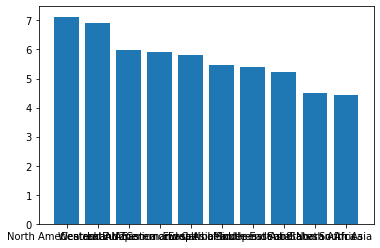

In [8]:
plt.bar(x = happiest_regions['Regional indicator'], height = happiest_regions['Ladder score'])
plt.show()

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In this next plot we dont use the `happiest regions` grouping created above.  We simply apply the histogram function directly to the original data, specifying what the bars will represent (x= `Regional Indicator`) and what detertmines the height of the bars (y=`Ladder Score`).

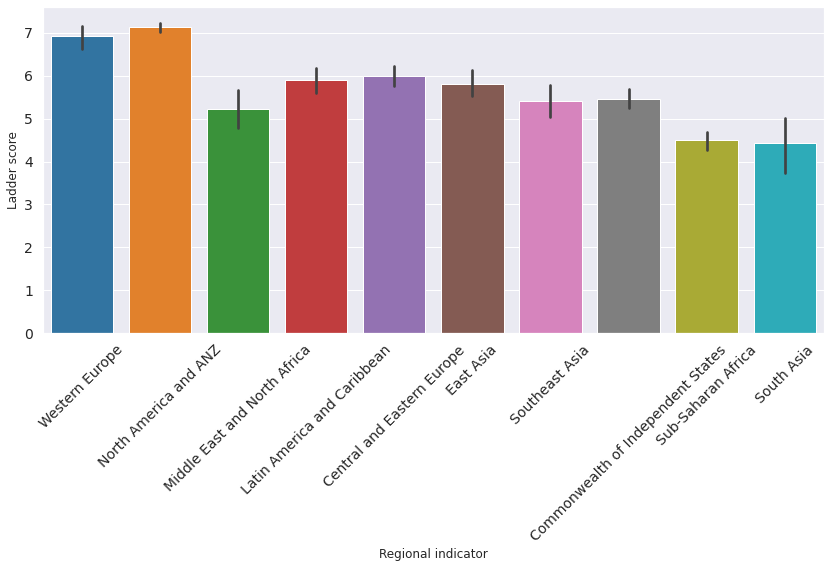

In [10]:
plt.figure(figsize=(14,6))
sns.barplot(x='Regional indicator', y='Ladder score', data=df, palette="tab10")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Histogram

## Plotly Express

The `plotly` histogram plot shown below shows us a different kind of information, the distribution of the `ladder score`; for example, 24 countries earned a ladeer score of between 4.5 and 5.5, many of those in Sub Saharan Africa (the pink region).

In [11]:
px.histogram(df, x='Ladder score', color='Regional indicator')

## Matplotlib

Although the style is different, the same information can be represented in `matplotlib`.

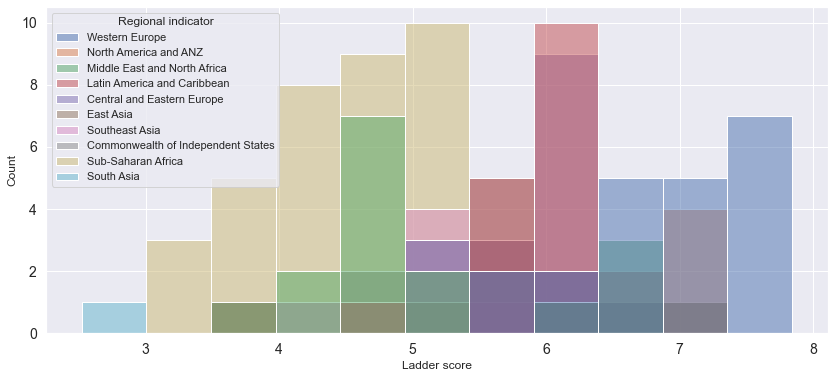

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Ladder score', hue='Regional indicator')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Scatterplot

## Plotly

In [12]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [13]:
px.scatter(df, x='Ladder score', y='Logged GDP per capita', color='Regional indicator')

## Matplotlib

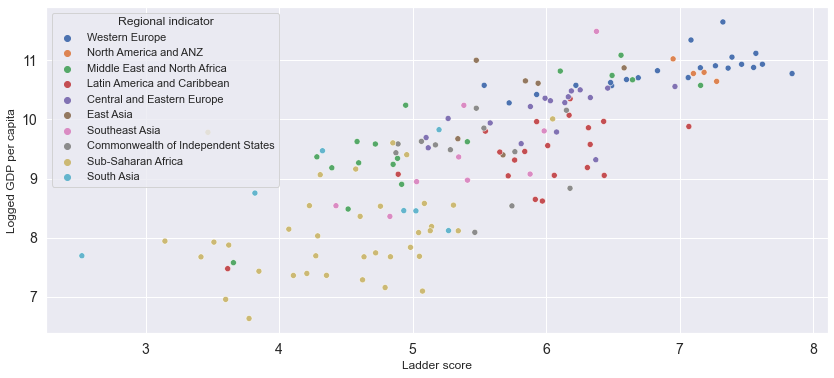

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='Ladder score', y='Logged GDP per capita', hue='Regional indicator')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Line Charts

## Plotly Express

In [18]:
#df2 = pd.read_csv('world-happiness-report-2021/world-happiness-report.csv')
data_url2 = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/visualization/world-happiness-report.csv'
df2 = pd.read_csv(data_url2)
df2.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [19]:
px.line(df2, x='year', y='Life Ladder', color='Country name')

In [20]:
first_10_countries = df2.head(110)

In [21]:
px.line(first_10_countries, x='year', y='Life Ladder', color='Country name')

## Matplotlib

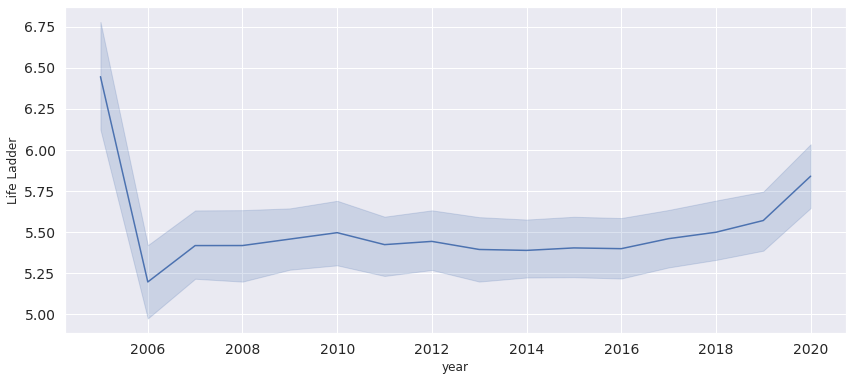

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df2, x='year', y='Life Ladder')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

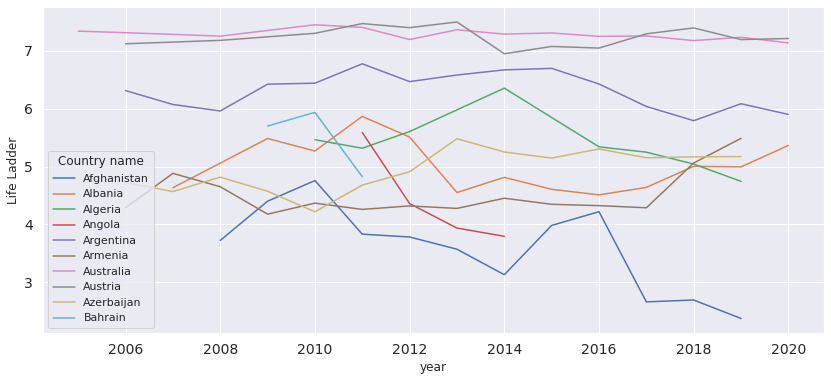

In [23]:
plt.figure(figsize=(14,6))
sns.lineplot(data=first_10_countries, x='year', y='Life Ladder', hue='Country name')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Editing

## Matplotlib

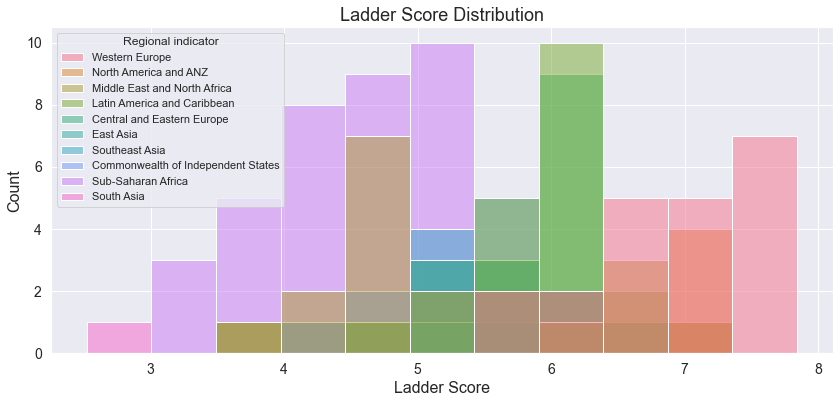

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Ladder score', hue='Regional indicator', palette='husl')
plt.title('Ladder Score Distribution', fontsize=18)
plt.xlabel('Ladder Score', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Plotly Express


In [25]:
px.histogram(df, x='Ladder score', color='Regional indicator',
            title='Ladder Score Distribution').update_layout(
            xaxis_title="Ladder Score",
            yaxis_title="Count",
            #legend_title="Legend Title",
            font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
    )
)